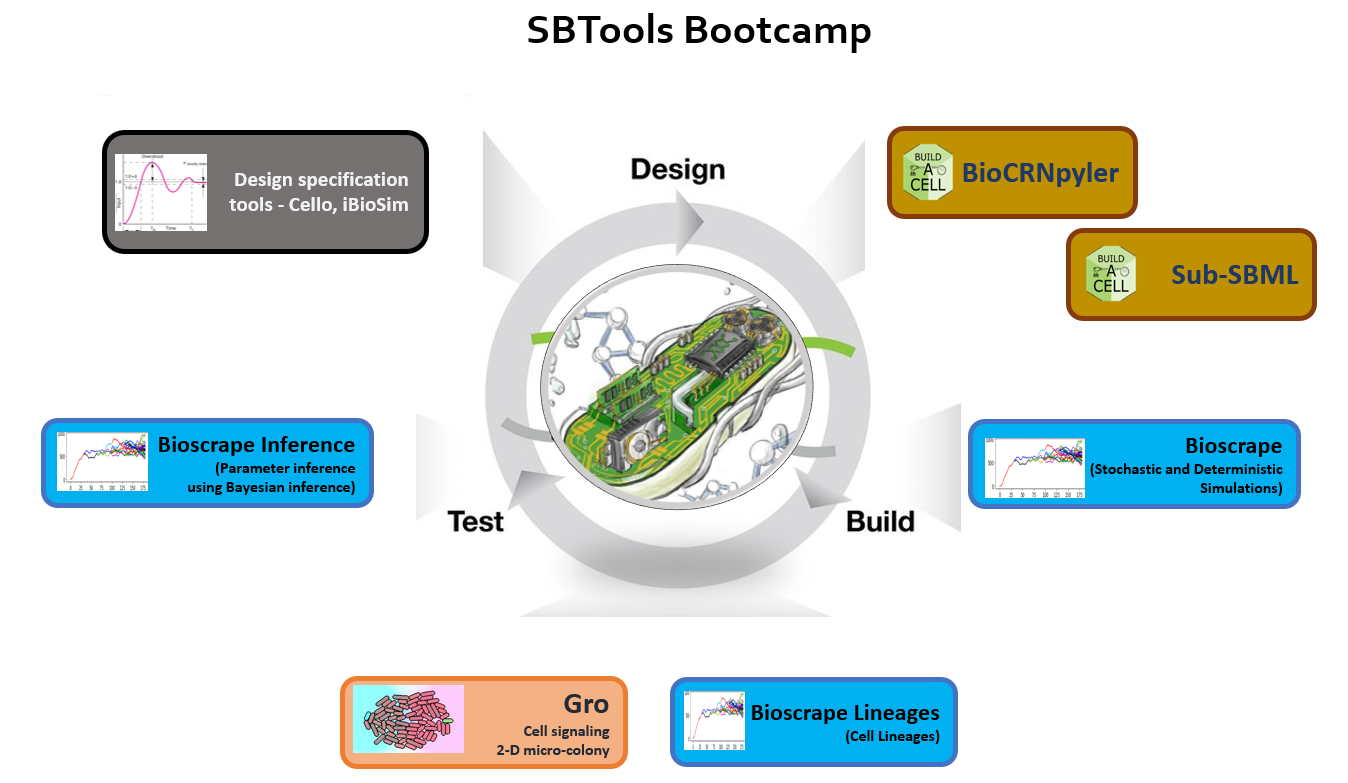

# The parameter inference problem:
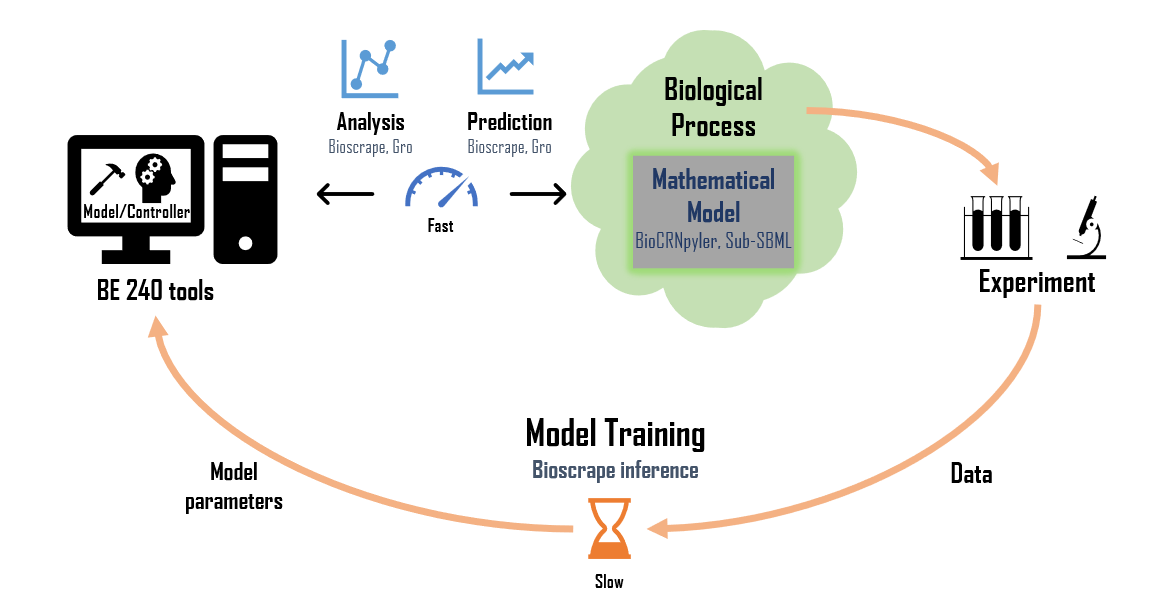

1. Optimization - Least squares/Maximum Likelihood Estimator (MLE), etc. - Find optimal parameter values.
2. Bayesian Inference - Find probability distributions of possible parameter values.
3. Machine learning approaches - Train neural network models that predict dynamics/output values.

**Our Goal : Use experimentally observed data to train a mathematical model that represents the dynamical behavior and mechanisms of the biological processes explicitly in order to then use the model for design and analysis.**

Challenges: 

1. Parameter non-identifiability :  two or more parametrizations are observationally equivalent.
2. Convergence issues : local or pseudo convergence
3. Physical meaning of identified parameters : to relate parameter values back to experiment design
4. Computational cost

Hence, in most cases of our interest in BE240, Bayesian inference techniques might turn out to be helpful as you can get a distribution of possible parameter values while being computationally cheaper than nonlinear optimization methods (especially for higher dimensions).

# Probability distributions and Markov Chains
A probability distribution is a function that gives the probabilities of occurence of events. 

Markov Chain: 
> A sequence $X_1, X_2, ...$ of random elements of some set is a _Markov chain_ if the conditional distribution of $X_{n+1}$ given $X_1, X_2, ..., X_n$ depends on $X_n$ only. (Charles J. Geyer, Handbook of Markov Chain Monte Carlo, 2011)

If $P[X_{n+1} | X_n]$ does not depend on $n$, then the Markov chain is said to have _stationary transition probabilities_. 
A Markov chain can be thought of as a **random walk** with given transition probabilities of jumping from one state to another. A stationary Markov chain is of particular interest for MCMC methods. 

# How to sample from a distribution? 
For example, if we wanted to sample from a multi-dimensional Gaussian  probability density 
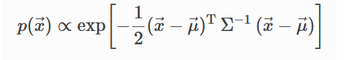

Or if we wanted to simulate a process in a computer (similar problem to generating samples from a probability distribution if model of the process is known).

# Monte Carlo method

Monte Carlo methods are computational / simulation methods that use independent and identically distributed samples (or "random sampling") to simulate a process in a computer. As you can imagine, the number of samples required to get good accuracies can be extremely high in Monte Carlo methods. 

It is a special case of MCMC as all of the samples are independent and identically distributed as opposed to samples drawn from a likelihood given the experimental data. 

$
\begin{align}
\text{statistical accuracy} \quad \propto \quad \frac{1}{\sqrt{\text{sample size}}}
\end{align}
$

Higher accuracy $\rightarrow$ lower variance $\rightarrow$ squared increase in sample size. 10 fold increase in accuracy required 100 fold increase in sample size.

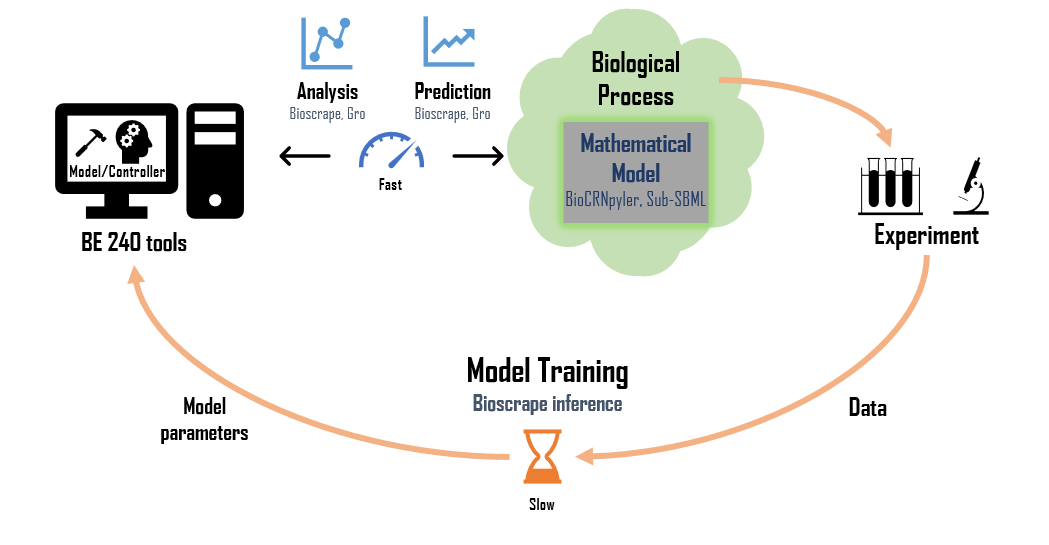

# Markov Chain Monte Carlo (MCMC) method 

Similar to Monte Carlo method but the stochastic dependence in the Markov chain changes the standard error and hence the effectiveness of the algorithm.

Markov chain Monte Carlo methods create samples from a random variable, with probability density proportional to a known desired function.

We can use MCMC sampling to solve the parameter inference problem. For a parameter vector $\Theta$ consisting of parameters that we want to estimate, according to Bayes' rule, we can write:


$
\begin{align}
\\ 
P[\Theta | \text{Data}] = \frac{P[\text{Data} | \Theta] P[\Theta]}{P(\text{Data}}
\\
\end{align}
$

Here,
* $P[\Theta | \text{Data}]$ : The posterior probability distribution (we want to find this out)
* $P[\text{Data} | \Theta ]$ : The likelihood probability distribution (given the experimental data, what is the probability that it was generated using the parameter set $\Theta$)
* $P[\Theta]$ : The prior probability distribution (what is the probability of parameters taking the values given by $\Theta$)
* $P[\text{Data}]$ : The generative model probability density - can be ignored for parameter inference as it does not depend on parameter values and acts as a normalizing factor. 




**Generate M samples from posterior probability density ⇔ parameter identification given experimental data**

In summary, 

**Markov chain Monte Carlo methods can be used to create random walks in the parameter space that converges so that the samples are drawn from the posterior probability distribution of the parameter set. It uses a “cost function” to decide the “acceptance of a sample”.**


# Metropolis-Hastings sampling algorithm
(adapted from Charles J. Geyer, Handbook of Markov Chain Monte Carlo, 2011)
* From a current state $X$, propose a move to $Y$, with conditional probability density given $X$ - denoted by $Q(X,Y)$. This can be arbitrary but affects algorithm performance. 
* Accept the proposal $Y$ with probability:
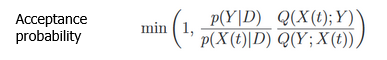
So, the new state will be $Y$ with the acceptance probability or remains the same as $X$ with probability $1 - \text{acceptance probability}$. 
* For the initial state : $P[X|\text{Data}]$ cannot be zero. 
* A fixed number of walkers are initialized and then each "walker" forms its own Markov chain of certain number of steps. We get convergence to the desired distribution up to a constant factor for the walkers. 

# Python _emcee_ - An advanced Metropolis-Hastings sampler for MCMC algorithm 
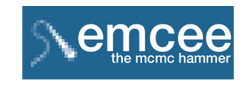
* Implements an improved M-H algorithm that has fewer arbitrary parameters and better convergence rates.
* The algorithm is designed for parallelization with each walker parallelized into its own Markov chain. Hence, can take advantage of multiple CPU cores.

## Important `emcee` terminology to understand before running inference:

* Number of walkers (`nwalkers`) : The number of random walks to simulate (each walker creates its own chain)

__General guideline__: Larger number of walkers are better (however, compuational time increases linearly with number of walkers).

* Number of steps (`nsteps`) : The length of each Markov chain.

__General guideline__: Larger number of steps are better.
* Number of samples to choose :  The samples chosen as the representative posterior distribution for each parameter.

__General guideline__: If MCMC has converged, a few samples should be enough to represent the posterior density.

* Autocorrelation time : The time it takes before independent samples are drawn from the posterior density (more on this later).

__General guideline__: Lower autocorrelation time is better.

## Convergence checking:

1. The autocovariance function
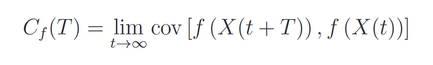

This measures the covariances between samples at a time lag $T$. The value of T where $C_f(T) \rightarrow 0$  measures the number of samples that must be taken in order to ensure independence of samples.

**Shorter the autocorrelation time $\rightarrow$ Higher convergence rate**
**Longer autocorrelation time $\rightarrow$ more samples are needed to get a representative set from the posterior density**

Python `emcee` provides `get_autocorr_time()` function for `sampler` objects. Bioscrape inference does this automatically for every MCMC run (can be toggled using `convergence_check = False`).  

2. Parameter samples - check for independence of posterior samples / exploration of prior space.

3. Cost function progress
Bioscrape inference keeps a record of the cost function progress under `cost_progress` parameter of `MCMC` class.

## Pitfalls: 
* Multimodal distributions may cause convergence issues - samples getting stuck in low probability “valleys”. Solution is to split into disjoint single-mode and independently sample then combine “properly”.

* Parameter vectors should be objects on which linear operations can be made.


# The bioscrape inference $\leftrightarrow$ emcee relationship
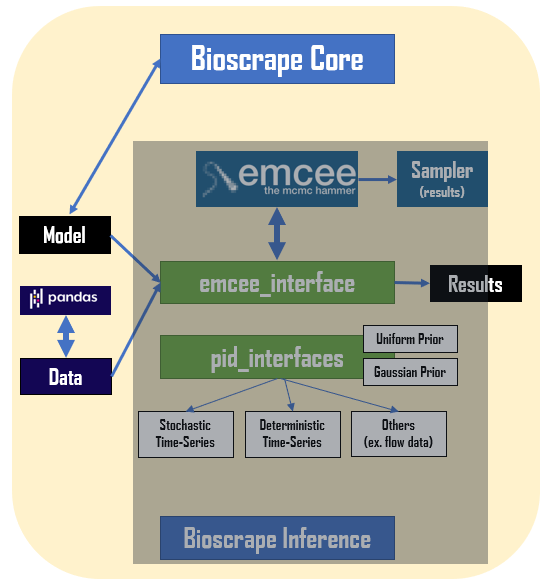

# Check for updates to your bioscrape installation! 

```
git pull origin master
cd bioscrape
python setup.py install
```

(assuming your remote repository is called `origin`)

In the `inference examples` folder in the bioscrape directory you can find all the examples that we will discuss in this lecture.

# Examples:

## 1. Linear Model (y = mx + b)
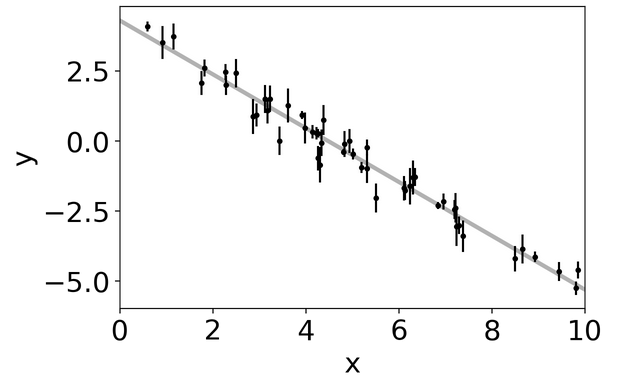


## 2. Birth-death process ($\varnothing \rightarrow X \rightarrow \varnothing$)
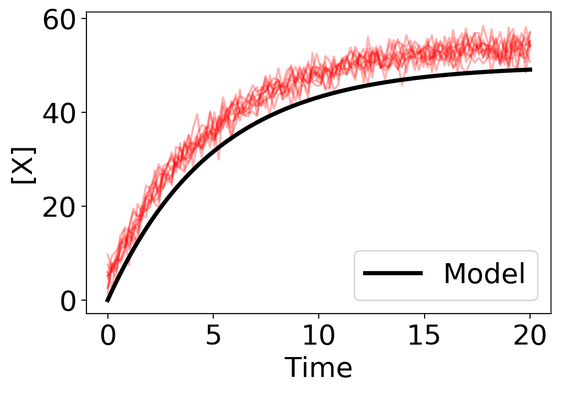

## 3. Multiple trajectories, time points, and initial conditions
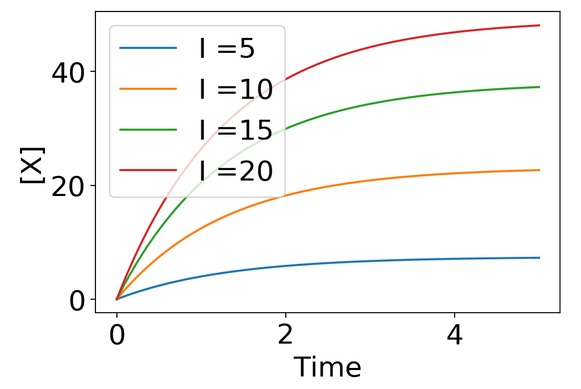

## 4. Stochastic Inference 
## 5. Developer Overview - Parameter identification interfaces
## 6. Real datasets
    a. Population control of bacterial consortia - Reed 
    b. Quorum sensing based signaling in bacteria - Mark
    c. Wound healing circuit - Leo

# Things to try:

* Best use case: Use experimental data for your circuit model (if you have it).


* Create artificial data:

    a. Simulate model, then add appropriate stochastic noise (as expected from experiments)
    
    b. Simulate a more detailed model / a different mechanism for your circuit - Use as data for simpler model
    
    c. Get data from publicly available repositories that might be similar to your project.
    
    d. Simulate bioscrape lineages to get cell growth trajectories and use it as data for an ODE model.
  
  
* Implement multiprocessing to parallelize MCMC simulations in bioscrape - a key feature of Python emcee.


* Implemenet new parameter identification interfaces for other kinds of data that you might have. For example : Flow cytometry data, bioscrape lineages, microscope movies data? 
